Setting up the Time Series

In [2]:
#import dependencies
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from numpy import log

In [3]:
#read in csv containing countries involved in the Holocaust (countries provided by the United States Holocaust Museaum)
csv = "Holocaust.csv"

full_data = pd.read_csv(csv)

#reduce dataframe to just the object number (unique per piece) and year the Met acquired the piece
year_acq = full_data[["Object Number", "AccessionYear"]]

year_acq.head()

,Object Number,AccessionYear
0,17.190.1707,1917.0
1,26.101.6,1926.0
2,67.155.23,1967.0
3,49.109,1949.0
4,59.7,1959.0


In [4]:
#group the pieces by year acquired
year_acq_group = year_acq.groupby("AccessionYear").count()

year_acq_group

,Object Number
AccessionYear,
1883.0,31
1885.0,1
1888.0,1
1889.0,724
1890.0,7
...,...
2015.0,8
2016.0,3
2018.0,32


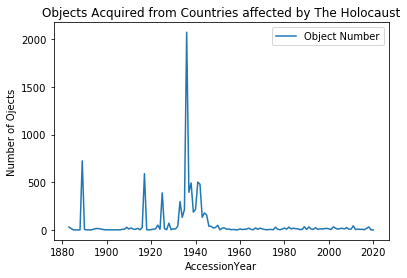

In [8]:
#plot the data as a time series - years on X and number of items acquired on Y
year_acq_group.plot()
pyplot.ylabel("Number of Ojects")
pyplot.title("Objects Acquired from Countries affected by The Holocaust")
pyplot.show()

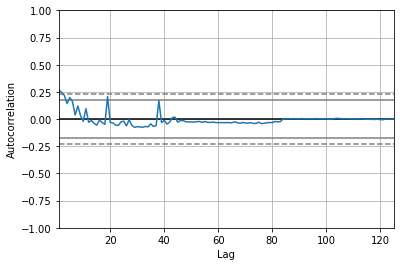

In [5]:
#plot the autocorrelation for lags in time series
autocorrelation_plot(year_acq_group)
pyplot.show()

#positive trend for the first approx 10 lags.  Start AR param at 5

Create the ARIMA model

In [6]:
#import additional dependencies
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [9]:
#fit the model using year_acq_group data
model = ARIMA(year_acq_group, order=(0,1,1))
model_fit = model.fit()

#summary of the fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Object Number   No. Observations:                  125
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -839.496
Date:                Thu, 25 Feb 2021   AIC                           1682.992
Time:                        21:31:22   BIC                           1688.633
Sample:                             0   HQIC                          1685.284
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7871      0.071    -11.101      0.000      -0.926      -0.648
sigma2      4.413e+04   1280.593     34.461      0.000    4.16e+04    4.66e+04
Ljung-Box (L1) (Q):                   0.06   Jarque-

C:\Users\lksh0\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lksh0\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lksh0\anaconda3\envs\PythonAdv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


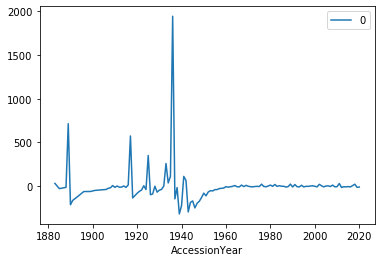

In [10]:
# Plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

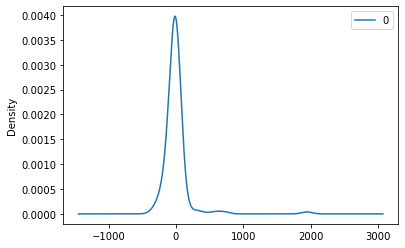

In [11]:
#density plot of the residuals
residuals.plot(kind='kde')
pyplot.show()

In [12]:
#summary stats of residuals
print(residuals.describe())

                 0
count   125.000000
mean     -1.608006
std     211.176979
min    -318.326395
25%     -40.452129
50%      -8.195238
75%       0.937331
max    1943.837798


Test/Train datasets

In [13]:
#create test and train datasets
X = year_acq_group.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [X for X in train]
predictions = list()

In [16]:
#walk-forward validation
for t in range(len(test)):
    model = ARIMA (history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9.731317, expected=8.000000
predicted=9.812425, expected=3.000000
predicted=8.299141, expected=10.000000
predicted=9.003131, expected=21.000000
predicted=11.795202, expected=9.000000
predicted=10.612571, expected=30.000000
predicted=15.301309, expected=12.000000
predicted=13.685096, expected=19.000000
predicted=15.039586, expected=14.000000
predicted=14.567251, expected=13.000000
predicted=14.227173, expected=4.000000
predicted=11.873283, expected=7.000000
predicted=11.167898, expected=34.000000
predicted=16.813886, expected=6.000000
predicted=13.271550, expected=32.000000
predicted=18.119062, expected=11.000000
predicted=15.639873, expected=7.000000
predicted=13.859905, expected=24.000000
predicted=16.651342, expected=7.000000
predicted=13.947106, expected=12.000000
predicted=13.885205, expected=11.000000
predicted=13.311548, expected=14.000000
predicted=13.607621, expected=17.000000
predicted=14.387205, expected=12.000000
predicted=13.672496, expected=5.000000
predicted=11.

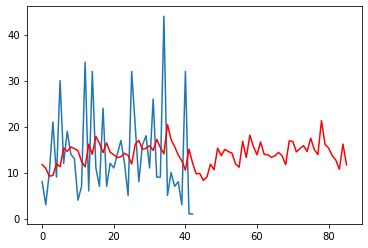

In [19]:
#plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()